In [61]:
# Data Processing
import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [62]:
# Read data and split
data = pd.read_csv("dataset_1.csv")
X = data.iloc[:, 1:133]
y = data.iloc[:, 133]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
print(X)
print(X.info())
print(y)

    2Hz_B1_red  2Hz_B1_green  2Hz_B1_blue  2Hz_B2_red  2Hz_B2_green  \
0     0.444666      0.539361     0.015973    0.129066      0.674274   
1     0.351683      0.626640     0.021677    0.166441      0.658370   
2     0.400314      0.584569     0.015117    0.099085      0.763181   
3     0.193525      0.800485     0.005990    0.177893      0.598966   
4     0.285225      0.271677     0.443098    0.321829      0.570020   
5     0.006132      0.975471     0.018397    0.242465      0.533439   
6     0.001997      0.958072     0.039932    0.172167      0.605964   
7     0.000856      0.925128     0.074016    0.204930      0.636262   
8     0.367370      0.553908     0.078722    0.035706      0.900437   
9     0.483885      0.456931     0.059184    0.135109      0.696541   
10    0.001854      0.988734     0.009412    0.155149      0.690020   
11    0.004706      0.979179     0.016115    0.196581      0.566600   
12    0.784227      0.206361     0.009412    0.035865      0.712207   
13    

In [64]:
#Fitting and Evaluating Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy

In [65]:
# Accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


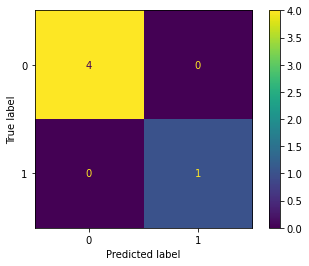

In [66]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Visualizing Results

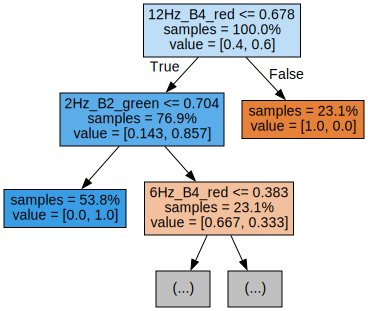

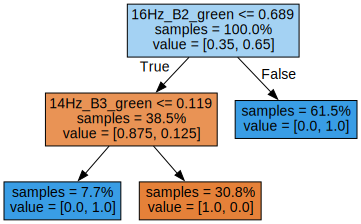

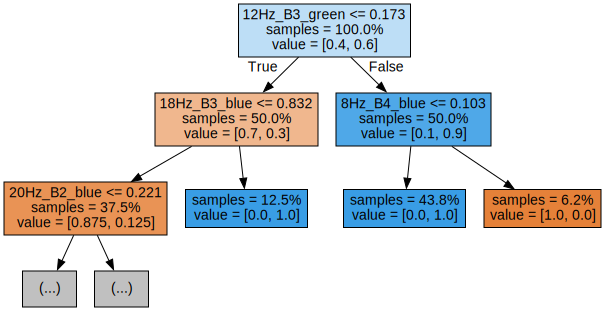

In [67]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

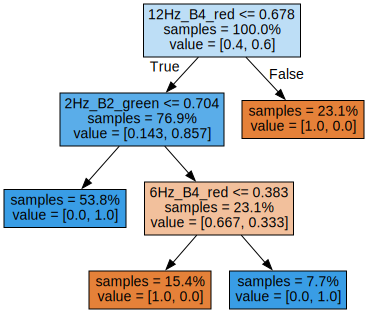

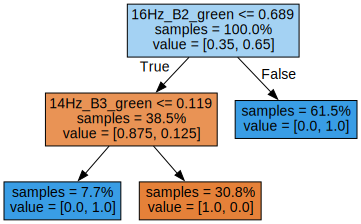

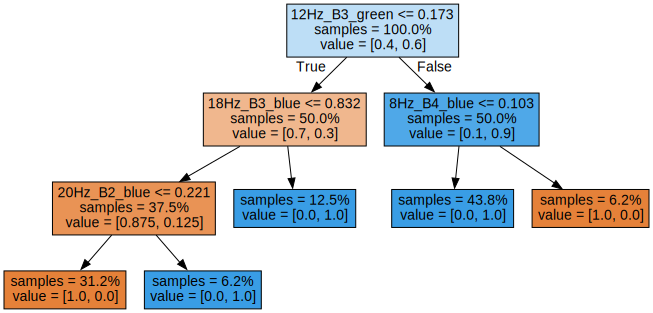

In [68]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Hyperparameter Tuning

MISC

In [69]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 443}


In [70]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.4
Precision: 0.25
Recall: 1.0


<AxesSubplot:>

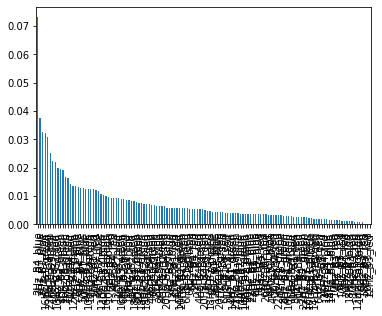

In [71]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [72]:
from sklearn.neighbors  import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [73]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=8)
accuracies

array([0.66666667, 0.33333333, 0.33333333, 0.33333333, 1.        ,
       0.        , 0.5       , 0.        ])

In [74]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.3958333333333333
average std : 0.31110801089725165


In [75]:
knn.fit(X_train,y_train)
print("test accuracy :",knn.score(X_test,y_test))

test accuracy : 0.6


In [76]:
#Implementing cross validation
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
k = 3
kf = KFold(n_splits=k, random_state=42, shuffle=True)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.4444444444444444, 0.5, 0.75]
Avg accuracy : 0.5648148148148148
